# Import libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import time

import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.feature_extraction import DictVectorizer
dicv=DictVectorizer()

from sklearn.metrics import mean_squared_error
from math import sqrt

from matplotlib.colors import ListedColormap 

from sklearn import ensemble
from sklearn.model_selection import GridSearchCV

[nltk_data] Downloading package stopwords to /Users/yoga/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
import warnings
warnings.filterwarnings('ignore')
sns.set_context('notebook') 
sns.set_style('ticks')
colors = ['#1F77B4', '#FF7F0E', '#2CA02C', '#DB2728', '#9467BD', '#8C564B', '#E377C2','#7F7F7F', '#BCBD22', '#17BECF']
crayon = ['#4E79A7','#F28E2C','#E15759','#76B7B2','#59A14F', '#EDC949','#AF7AA1','#FF9DA7','#9C755F','#BAB0AB']
sns.set_palette(colors) 

# TASK A

## Import DATASET

In [3]:
dfa=pd.read_csv('User_Comments.csv')
ax= dfa['CONTENT']
ay= dfa['CLASS']

### Train_test split

In [4]:
ax_train,ax_test,ay_train,ay_test= train_test_split (ax,ay,test_size=0.2,random_state=0)

## TASK A-- (a) build bag of word

In [5]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf= TfidfVectorizer(min_df=2, stop_words='english',max_features=500, max_df=0.97)

In [6]:
tfidf.fit(ax_train)
ax_train= tfidf.fit_transform(ax_train)

## TASK A-- (b) build  Random Forest

### tranform testing data

In [7]:
ax_test= tfidf.transform(ax_test)

In [8]:
rf = ensemble.RandomForestClassifier(class_weight = 'balanced',random_state=0)
rf.fit(ax_train, ay_train)

RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='gini', max_depth=None, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=0,
            verbose=0, warm_start=False)

In [9]:
ay_pred = rf.predict(ax_test)

In [10]:
print(classification_report(ay_test, ay_pred, digits=4)) 
print(confusion_matrix(ay_test, ay_pred))

             precision    recall  f1-score   support

          0     0.9744    0.9948    0.9845       191
          1     0.9750    0.8864    0.9286        44

avg / total     0.9745    0.9745    0.9740       235

[[190   1]
 [  5  39]]


## TASK A--B


In [11]:
param_grid = {'max_depth': np.arange(50,60,1),
            'n_estimators': np.arange(10,25,1)
              }

rf_cv = GridSearchCV(ensemble.RandomForestClassifier(class_weight = 'balanced'), 
                     param_grid,
                     cv=5,
                     return_train_score=True)

print("Running....")

tic = time.time()
rf_cv.fit(ax_train, ay_train)
toc = time.time()
print("Training time: {0}s".format(toc - tic))

rf = rf_cv.best_estimator_
print(rf)

Running....
Training time: 26.479278087615967s
RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='gini', max_depth=55, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=24, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)


In [12]:
rf_cv.best_params_

{'max_depth': 55, 'n_estimators': 24}

In [13]:
bestrf= ensemble.RandomForestClassifier(max_depth=52,n_estimators=16)
bestrf.fit(ax_train,ay_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=52, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=16, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [14]:
ay_pred = bestrf.predict(ax_test)
print (classification_report(ay_test, ay_pred,digits=4))
print (confusion_matrix(ay_test, ay_pred))

             precision    recall  f1-score   support

          0     0.9793    0.9895    0.9844       191
          1     0.9524    0.9091    0.9302        44

avg / total     0.9742    0.9745    0.9742       235

[[189   2]
 [  4  40]]


## TASK A- (c) 

In [15]:
result = pd.DataFrame(rf_cv.cv_results_)
result = result[result['param_max_depth']==52]

In [16]:
test= result[['mean_test_score']]
train= result[['mean_train_score']]
number_of_trees= result[['param_n_estimators']]

<function matplotlib.pyplot.savefig(*args, **kwargs)>

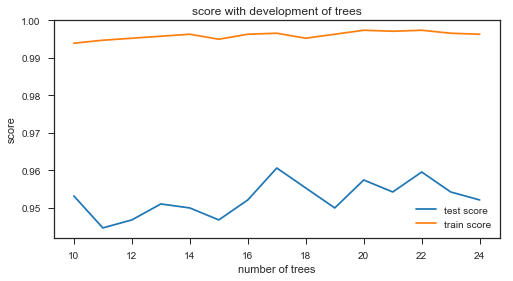

In [17]:
plt.figure(figsize=(8,4))
plt.xlabel('number of trees')
plt.ylabel('score')
plt.title("score with development of trees") 

plt.plot(number_of_trees,test,label='test score')
plt.plot(number_of_trees,train,label='train score')
plt.legend(loc=4)
plt.savefig

## TASK A-- D 
histogram depths of the tree

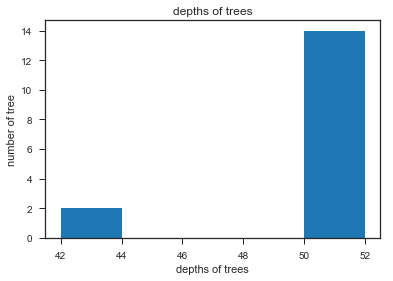

In [18]:
# with depth of tree fixed
number_of_tree= bestrf.n_estimators
depth =[estimator.tree_.max_depth for estimator in bestrf.estimators_]
x = depth
group_number= 5
plt.hist(x, bins=group_number)
plt.xlabel('depths of trees')
plt.ylabel('number of tree')
plt.title("depths of trees") 
plt.show()

## TASK A-- E 
top 10 most important text feature

In [19]:
feature_name= tfidf.get_feature_names()
feature_name= np.asarray(feature_name)

In [20]:
top10_feature= - bestrf.feature_importances_
label = np.argsort(top10_feature)

In [21]:
top10_name = feature_name[label][:10]

In [22]:
top10_figures = -top10_feature[label][:10]

In [23]:
feature_name= tfidf.get_feature_names()
feature_name= np.asarray(feature_name)
top10_feature= - bestrf.feature_importances_
label = np.argsort(top10_feature)
top10_name = feature_name[label][:10]
top10_figures = -top10_feature[label][:10]
dic={}
for i in range(0,len(top10_name)):
    dic[top10_name[i]]=round(top10_figures[i],4)
dic

{'check': 0.1095,
 'subscribe': 0.098,
 'com': 0.0939,
 'youtube': 0.0579,
 'channel': 0.0389,
 'http': 0.0376,
 'video': 0.0372,
 'www': 0.0275,
 'comment': 0.0272,
 'facebook': 0.0207}

# TASK B

## Import Dataset

In [24]:
dfb=pd.read_csv('NBA_Train.csv')
test_x=pd.read_csv('NBA_Test.csv')
test_y=pd.read_csv('NBA_Test_Target.csv')
dfb.shape

(127, 22)

In [25]:
bx=dfb.drop(columns=['SALARY'])
by=dfb['SALARY']

## TASK B split Categorical and numerical 

In [26]:
# split categorical and numerical columns
bx_categorical= bx[['POSITION','TEAM']]
bx_numerical= bx.drop(columns=['POSITION','TEAM'])

### process training target

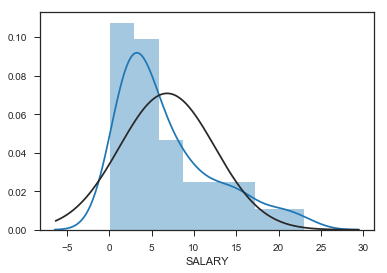

In [27]:
from scipy.stats import *
sns.distplot((by),fit=norm)
plt.show()

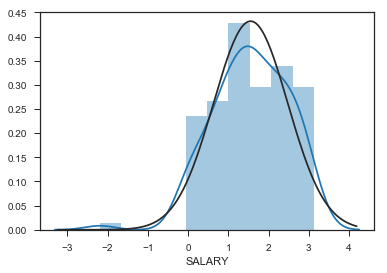

In [28]:
sns.distplot(np.log(by),fit=norm)
plt.show()

In [29]:
dfb.corr().round(4)

,Train_ID,SALARY,Age,Games,Minutes,PER,TS,ORB,DRB,TRB,AST,STL,BLK,TOV,USG,ORtg,DRtg,OWS,DWS,WS
Train_ID,1.0000,0.0156,-0.0523,-0.1072,-0.1052,-0.1056,0.0275,-0.0645,-0.0482,-0.0574,0.1146,0.0697,0.0517,0.2342,-0.1625,-0.0158,0.0045,-0.0748,-0.0863,-0.0920
SALARY,0.0156,1.0000,0.0471,0.1785,0.6118,0.6735,0.2158,-0.0520,0.1704,0.0924,0.3183,0.1818,-0.0452,-0.1147,0.6230,0.2538,-0.2664,0.5958,0.6207,0.6738
Age,-0.0523,0.0471,1.0000,-0.1160,-0.0085,0.0968,0.2255,-0.0749,0.0528,0.0078,0.0779,-0.0141,-0.0318,0.0637,0.0270,0.1654,-0.1160,0.0443,0.0782,0.0606
Games,-0.1072,0.1785,-0.1160,1.0000,0.6934,0.1939,0.2033,-0.0230,-0.0639,-0.0509,0.0295,-0.0342,-0.0852,-0.1851,0.1169,0.2704,-0.1025,0.3780,0.4825,0.4611
Minutes,-0.1052,0.6118,-0.0085,0.6934,1.0000,0.5350,0.2328,-0.2782,-0.1309,-0.2017,0.3923,0.1877,-0.2320,-0.2234,0.4883,0.3424,-0.0211,0.6599,0.6675,0.7419
PER,-0.1056,0.6735,0.0968,0.1939,0.5350,1.0000,0.4996,0.1124,0.3304,0.2648,0.3788,0.1578,0.0928,-0.1893,0.7485,0.5925,-0.3020,0.8244,0.5869,0.8403
TS,0.0275,0.2158,0.2255,0.2033,0.2328,0.4996,1.0000,0.0411,0.0006,0.0234,-0.0159,0.0453,0.1347,-0.0273,0.0380,0.8591,-0.1000,0.6070,0.2142,0.5434
ORB,-0.0645,-0.0520,-0.0749,-0.0230,-0.2782,0.1124,0.0411,1.0000,0.7517,0.9022,-0.5037,-0.3513,0.6389,0.1106,-0.1758,0.0853,-0.4793,-0.0860,0.1161,-0.0279
DRB,-0.0482,0.1704,0.0528,-0.0639,-0.1309,0.3304,0.0006,0.7517,1.0000,0.9620,-0.3833,-0.3277,0.6014,-0.0358,0.1112,-0.0058,-0.5712,0.0555,0.2979,0.1439
TRB,-0.0574,0.0924,0.0078,-0.0509,-0.2017,0.2648,0.0234,0.9022,0.9620,1.0000,-0.4569,-0.3615,0.6559,0.0246,0.0030,0.0344,-0.5812,0.0053,0.2495,0.0884


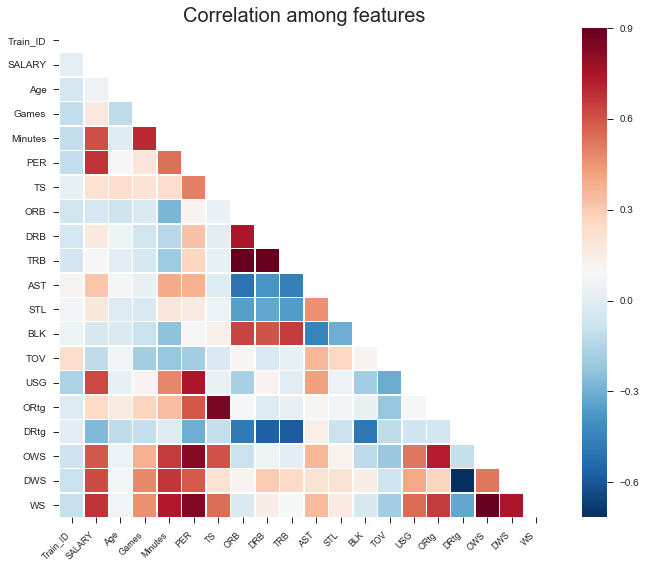

In [51]:
corr= dfb.corr().loc['SALARY'].sort_values().round(4)
dfb.corr().head()
corrmat = dfb.corr()
plt.subplots(figsize=(12,9))
mask = np.zeros_like(corrmat)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(corrmat, vmax=0.9, square=True, cmap='RdBu_r',mask=mask, linewidths=0.5)
plt.xticks(rotation=45,fontsize=9,ha='right')
plt.title('Correlation among features',fontsize=20)
plt.savefig('corr2.png',dpi=900)

###  Processing numerical data 

### drop low correlation columns

In [31]:
numerical_new=bx_numerical.drop(columns=['ORB','BLK','Train_ID','Age','TRB'])
numerical_new.shape

(127, 14)

In [32]:
def plot_regressions(X, y):
    labels = list(X.columns)
    N, p = X.shape
    rows = int(np.ceil(p/3)) 
    fig, axes = plt.subplots(rows, 3, figsize=(12, rows*(12/4)))
    for i, ax in enumerate(fig.axes):
        if i < p:
            sns.regplot(X.iloc[:,i], y,  ci=None, y_jitter=0.05, 
                        scatter_kws={'s': 25, 'alpha':.8}, ax=ax)
            ax.set_xlabel('')
            ax.set_ylabel('')
            ax.set_title(labels[i])
        else:
            fig.delaxes(ax)
    sns.despine()
    plt.tight_layout()   
    return fig, axes

In [33]:
numerical_combined= pd.concat([by,numerical_new],axis=1)

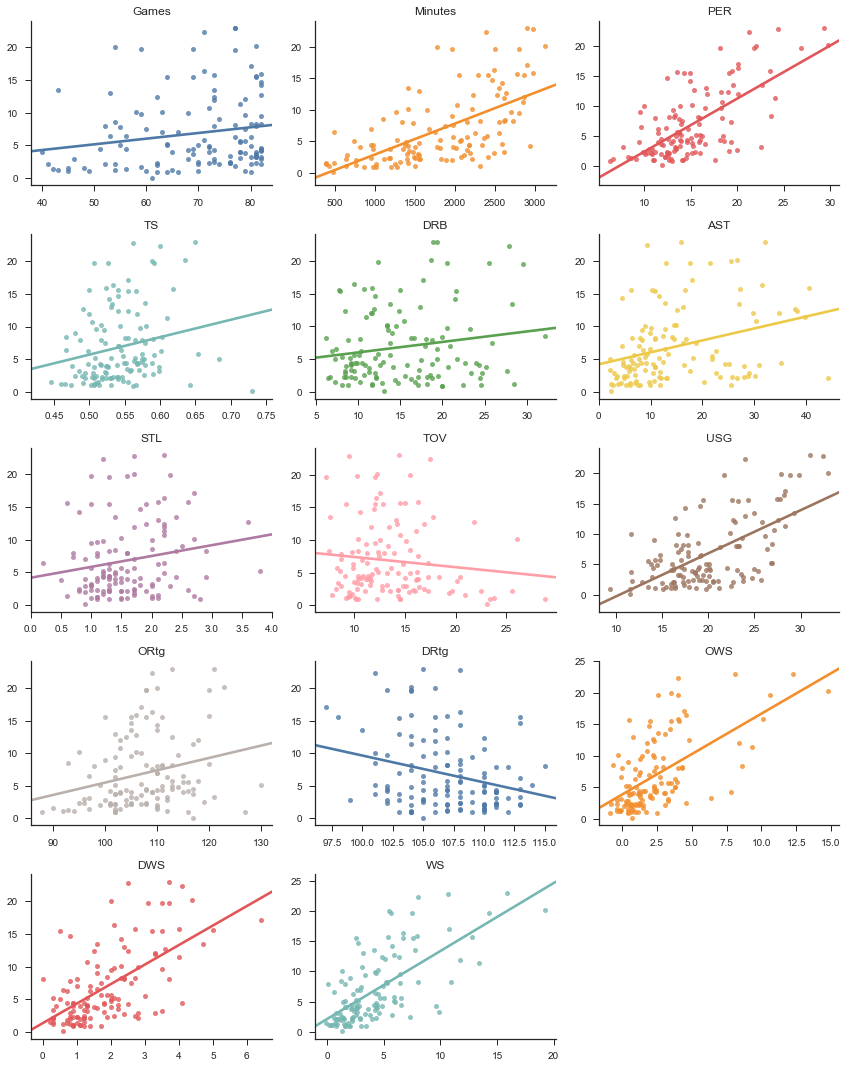

In [34]:
from statlearning import plot_regressions
with sns.color_palette(crayon):
    plot_regressions(numerical_combined.iloc[:,1:],numerical_combined.iloc[:,0])
    plt.savefig('temp1.png',dpi=900)

#### processing categorical data

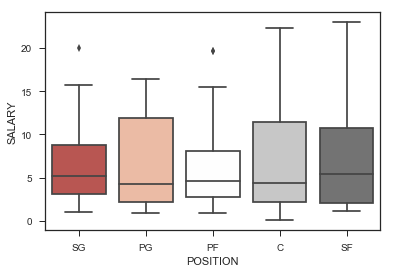

In [35]:
sns.boxplot(x=bx['POSITION'], y=by, palette='RdGy')
plt.xticks(rotation=0)  
plt.savefig('position2.png', dpi=900,bbox_inches='tight')

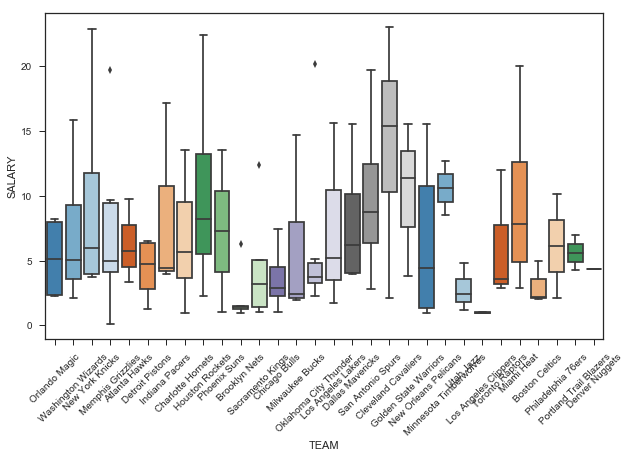

In [36]:
plt.figure(figsize=(10,6))
sns.boxplot(x=bx['TEAM'], y=by, palette='tab20c')
plt.xticks(rotation=45)  
plt.savefig('team1.png',dpi=900,bbox_inches='tight')

#### combine numercial and categorical dataset

In [37]:
bx_combined= pd.concat([numerical_new,bx_categorical],axis=1)
bx_combined.shape

(127, 16)

## feature engineering

In [38]:
from sklearn.feature_extraction import DictVectorizer
dict_vec = DictVectorizer()
bx_combined= dict_vec.fit_transform(bx_combined.to_dict(orient='records')).toarray()
bx_combined= pd.DataFrame(bx_combined)

In [39]:
from sklearn.preprocessing import StandardScaler
preprocessing= StandardScaler()
bx_processed = pd.DataFrame(preprocessing.fit_transform(bx_combined))

In [40]:
# test_x=test_x.drop(columns=['ORB','BLK','Test_ID','Age','TRB'])
# test_x.head()

In [41]:
test_x= dict_vec.transform(test_x.to_dict(orient='records')).toarray()
test_x= pd.DataFrame(preprocessing.transform(test_x))

## TASK B -- fit model

In [42]:
test_y=test_y.drop(columns='Test_ID')

In [43]:
#### Random forest
rf_reg = ensemble.RandomForestRegressor()
rf_reg.fit(bx_processed,np.log(by))
by_pred_rf=rf_reg.predict(test_x)
rmse= np.sqrt(mean_squared_error(test_y,np.exp(by_pred_rf)))
rmse.round(4)

4.1753

In [44]:
### random forest without log
rf_reg.fit(bx_processed,by)
by_pred_rf_nolog=rf_reg.predict(test_x)
rmse= np.sqrt(mean_squared_error(test_y,by_pred_rf_nolog))
rmse.round(4)

4.3956

In [45]:
### random forest grid search
param_grid = {'max_depth': np.arange(50,100,5),
            'n_estimators': [200,300,400,350]
              }

In [46]:
rf_reg_cv = GridSearchCV(rf_reg, 
                     param_grid,
                     cv=5)

rf_reg_cv.fit(bx_processed,by)

GridSearchCV(cv=5, error_score='raise',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'max_depth': array([50, 55, 60, 65, 70, 75, 80, 85, 90, 95]), 'n_estimators': [200, 300, 400, 350]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [47]:
by_pred_rf_cv=rf_reg_cv.predict(test_x)
rmse= np.sqrt(mean_squared_error(test_y,by_pred_rf_cv))
rmse.round(4)

4.1411

In [48]:
### elastic net
from sklearn.linear_model import ElasticNet
net=ElasticNet(alpha=0.6, fit_intercept=True, l1_ratio=0.5)

net.fit(bx_processed,by)
net_pred_no_log= net.predict(test_x)
rmse= np.sqrt(mean_squared_error(test_y,net_pred_no_log))
rmse.round(4)

4.0491

In [49]:
net.fit(bx_processed,np.log(by))
net_pred_log= net.predict(test_x)
rmse= np.sqrt(mean_squared_error(test_y,np.exp(net_pred_log)))
rmse.round(4)

5.0726